In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
data.shape

(2111, 17)

In [12]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

<Axes: ylabel='Gender'>

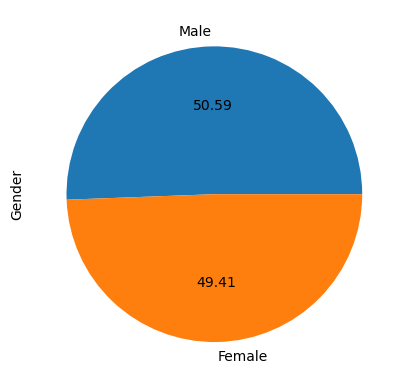

In [17]:
data['Gender'].value_counts().plot(kind="pie", autopct="%.2f")

(array([317., 909., 457., 190., 108., 101.,  17.,   4.,   7.,   1.]),
 array([14. , 18.7, 23.4, 28.1, 32.8, 37.5, 42.2, 46.9, 51.6, 56.3, 61. ]),
 <BarContainer object of 10 artists>)

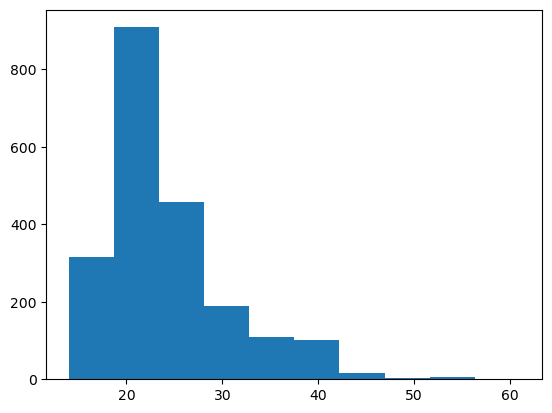

In [18]:
plt.hist(data['Age'], bins=10)

Age          Axes(0.125,0.653529;0.227941x0.226471)
Height    Axes(0.398529,0.653529;0.227941x0.226471)
Weight    Axes(0.672059,0.653529;0.227941x0.226471)
FCVC         Axes(0.125,0.381765;0.227941x0.226471)
NCP       Axes(0.398529,0.381765;0.227941x0.226471)
CH2O      Axes(0.672059,0.381765;0.227941x0.226471)
FAF              Axes(0.125,0.11;0.227941x0.226471)
TUE           Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

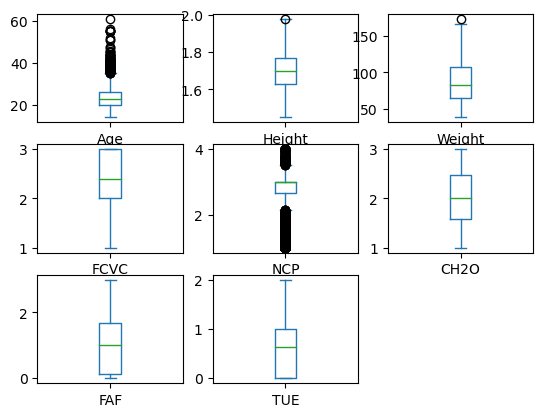

In [19]:
data.plot(kind='box', subplots= True, layout=(3,3), sharex=False, sharey=False)

<Axes: xlabel='Age', ylabel='Weight'>

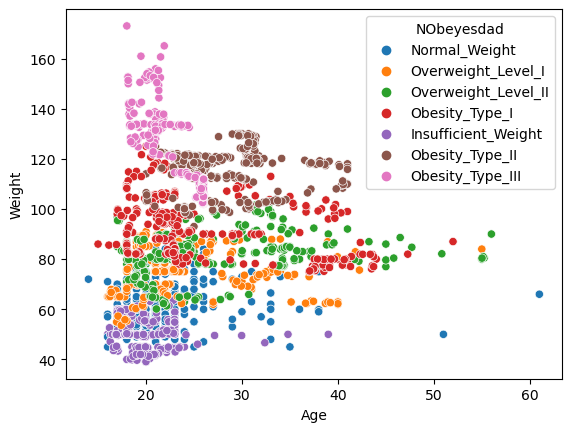

In [22]:
sns.scatterplot(data=data, x=data["Age"], y=data["Weight"], hue=data["NObeyesdad"])

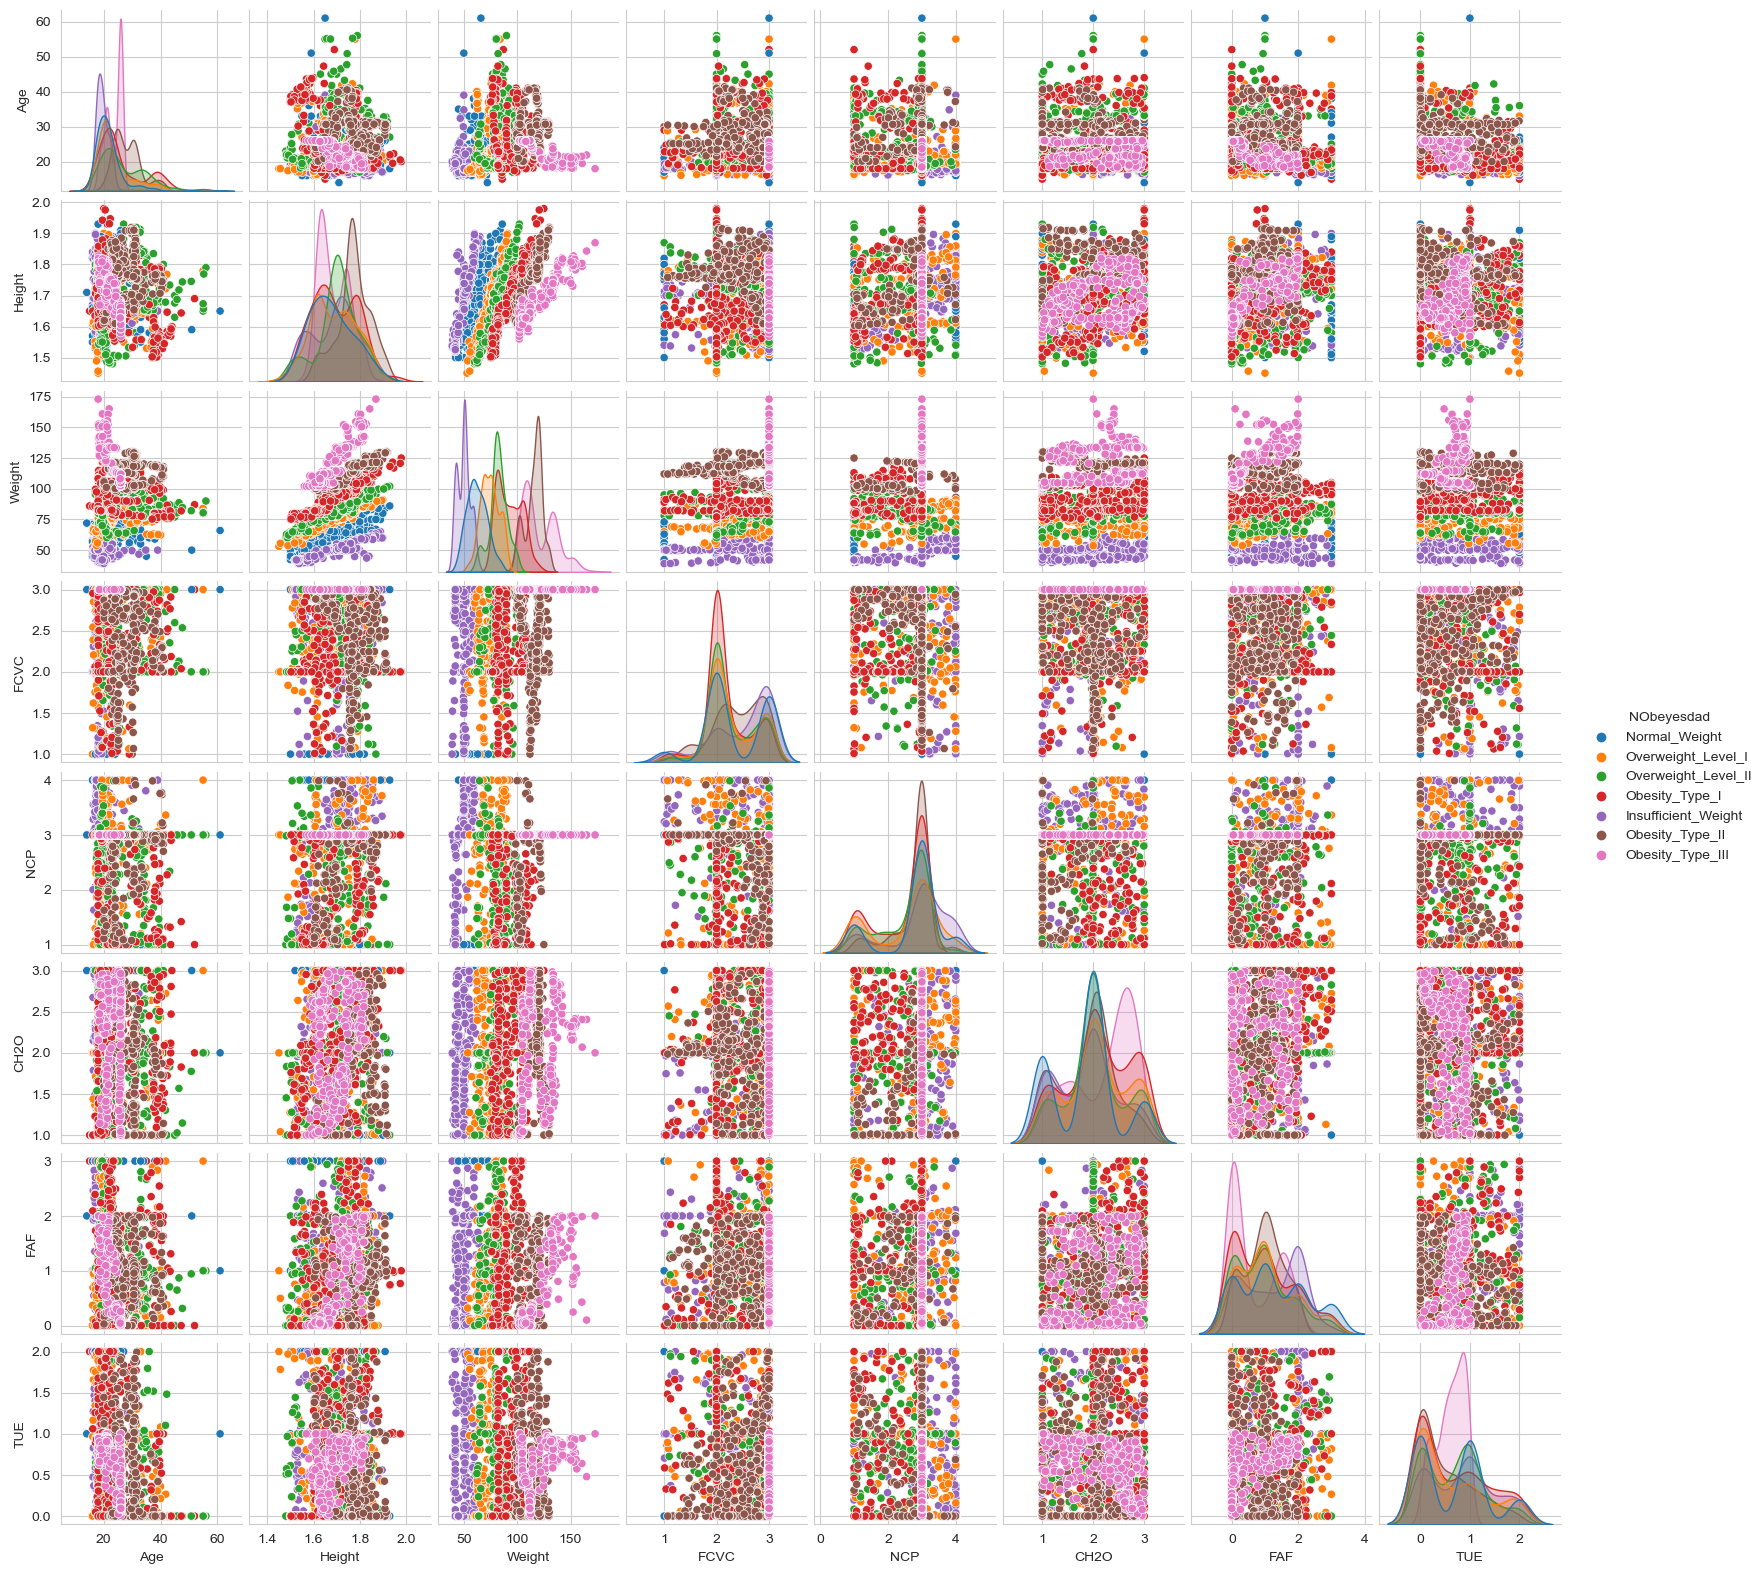

In [24]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="NObeyesdad", height=2)

<Axes: xlabel='Gender', ylabel='Age'>

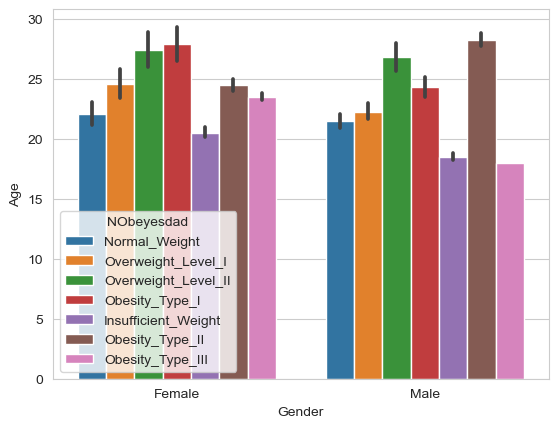

In [25]:
sns.barplot(data=data, x=data['Gender'], y=data['Age'], hue=data['NObeyesdad'])

In [27]:
data.groupby('NObeyesdad').size()

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64

__DATA ENGINEERING__

In [33]:
from sklearn.utils import resample
de_Insufficient_Weight =data[data['NObeyesdad']== "Insufficient_Weight"]
de_Normal_Weight =data[data['NObeyesdad']== "Normal_Weight"] 
de_Obesity_Type_I =data[data['NObeyesdad']== "Obesity_Type_I"] 
de_Obesity_Type_II =data[data['NObeyesdad']== "Obesity_Type_II"] 
de_Obesity_Type_III  =data[data['NObeyesdad']== "Obesity_Type_III"] 
de_Overweight_Level_I =data[data['NObeyesdad']== "Overweight_Level_I"] 
de_Overweight_Level_II  =data[data['NObeyesdad']== "Overweight_Level_II"]  

de_Insufficient_Weight_unsampled = resample(de_Insufficient_Weight, replace=True, n_samples=351, random_state=42)
de_Normal_Weight_unsampled = resample(de_Normal_Weight, replace=True, n_samples=351, random_state=42)
de_Obesity_Type_I_unsampled = resample(de_Obesity_Type_I, replace=True, n_samples=351, random_state=42)
de_Obesity_Type_II_unsampled = resample(de_Obesity_Type_II, replace=True, n_samples=351, random_state=42)
de_Obesity_Type_III_unsampled = resample(de_Obesity_Type_III, replace=True, n_samples=351, random_state=42)
de_Overweight_Level_I_unsampled = resample(de_Overweight_Level_I, replace=True, n_samples=351, random_state=42)
de_Overweight_Level_II_unsampled = resample(de_Overweight_Level_II, replace=True, n_samples=351, random_state=42)

In [34]:
de = pd.concat([de_Insufficient_Weight_unsampled, de_Normal_Weight_unsampled, de_Obesity_Type_I_unsampled, de_Obesity_Type_II_unsampled, de_Obesity_Type_III_unsampled, de_Overweight_Level_I_unsampled, de_Overweight_Level_II_unsampled])

In [35]:
de.groupby('NObeyesdad').size()

NObeyesdad
Insufficient_Weight    351
Normal_Weight          351
Obesity_Type_I         351
Obesity_Type_II        351
Obesity_Type_III       351
Overweight_Level_I     351
Overweight_Level_II    351
dtype: int64

In [36]:
de.duplicated().sum()

1083

In [37]:
de

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
575,Female,17.767432,1.743790,50.000000,no,yes,1.344854,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
743,Male,18.381382,1.722547,53.783977,yes,yes,2.000000,3.131032,Sometimes,no,2.072194,no,1.487987,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
579,Male,17.000000,1.848294,59.409018,yes,yes,2.440040,3.000000,Sometimes,no,2.000000,no,2.784471,1.000000,no,Automobile,Insufficient_Weight
544,Female,20.406871,1.755978,53.699561,yes,yes,2.000000,3.891994,Frequently,no,1.863930,no,2.870127,2.000000,no,Public_Transportation,Insufficient_Weight
661,Female,20.244359,1.559186,41.952805,no,yes,2.619835,1.000000,Frequently,no,1.198883,no,0.000000,0.751212,Sometimes,Public_Transportation,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Female,25.192910,1.700000,80.749657,yes,yes,2.545270,3.000000,Sometimes,no,2.269564,no,0.503122,1.000000,Frequently,Public_Transportation,Overweight_Level_II
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
1147,Female,23.629159,1.700020,80.420434,yes,yes,2.000000,3.000000,Sometimes,no,2.386904,no,0.926201,1.344030,Sometimes,Public_Transportation,Overweight_Level_II
1035,Male,17.971574,1.720379,85.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.802498,no,1.000000,0.417580,Sometimes,Public_Transportation,Overweight_Level_II


In [38]:
de.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [39]:
de.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [40]:
cols = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

In [41]:
le = LabelEncoder()
de[cols]= de[cols].apply(le.fit_transform)

In [42]:
de

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
575,0,48,650,66,0,1,34,440,1,0,0,0,704,560,2,3,0
743,1,91,578,102,1,1,115,345,2,0,412,0,541,755,2,3,0
579,1,17,993,143,1,1,283,331,2,0,363,0,764,560,3,0,0
544,0,236,725,101,1,1,115,423,1,0,306,0,770,755,3,3,0
661,0,226,79,16,0,1,350,0,1,0,75,0,0,402,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,571,478,353,1,1,321,331,2,0,517,0,196,560,1,3,6
492,1,930,478,436,0,1,534,331,1,0,0,0,0,0,3,0,6
1147,0,496,479,344,1,1,115,331,2,0,560,0,336,631,2,3,6
1035,1,54,570,424,1,1,115,331,2,0,749,0,382,223,2,3,6


In [43]:
scaled_de =de[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_de)

In [44]:
scaled_de

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
575,0,48,650,66,0,1,34,440,1,0,0,0,704,560,2,3,0
743,1,91,578,102,1,1,115,345,2,0,412,0,541,755,2,3,0
579,1,17,993,143,1,1,283,331,2,0,363,0,764,560,3,0,0
544,0,236,725,101,1,1,115,423,1,0,306,0,770,755,3,3,0
661,0,226,79,16,0,1,350,0,1,0,75,0,0,402,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,571,478,353,1,1,321,331,2,0,517,0,196,560,1,3,6
492,1,930,478,436,0,1,534,331,1,0,0,0,0,0,3,0,6
1147,0,496,479,344,1,1,115,331,2,0,560,0,336,631,2,3,6
1035,1,54,570,424,1,1,115,331,2,0,749,0,382,223,2,3,6


__DATA MODELLING AND EVALUATION__

In [45]:
x = de.drop("NObeyesdad", axis=1).values  # All features except target
y = de["NObeyesdad"].values  

In [46]:
x

array([[  0,  48, 650, ..., 560,   2,   3],
       [  1,  91, 578, ..., 755,   2,   3],
       [  1,  17, 993, ..., 560,   3,   0],
       ...,
       [  0, 496, 479, ..., 631,   2,   3],
       [  1,  54, 570, ..., 223,   2,   3],
       [  1, 802, 432, ...,   0,   3,   0]], dtype=int64)

In [47]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [48]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=1)

In [49]:
xtrain.shape

(1965, 16)

In [50]:
xtest.shape

(492, 16)

In [51]:
ytrain.shape

(1965,)

In [52]:
ytest.shape

(492,)

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=600),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
}

In [54]:
accuracy_results = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    accuracy_results[name] = accuracy

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
accuracy_results_sorted = dict(sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True))

In [56]:
accuracy_results_sorted

{'Random Forest': 0.991869918699187,
 'Decision Tree': 0.975609756097561,
 'SVM': 0.9308943089430894,
 'KNN': 0.8455284552845529,
 'Logistic Regression': 0.8414634146341463,
 'Naive Bayes': 0.5894308943089431}

In [57]:
best_model = models['Random Forest']
y_pred = best_model.predict(xtest)

In [58]:
y_pred

array([5, 6, 5, 1, 1, 4, 2, 3, 3, 1, 5, 4, 4, 5, 3, 5, 4, 5, 1, 1, 4, 3,
       3, 4, 3, 2, 1, 5, 2, 6, 4, 4, 2, 5, 4, 0, 3, 0, 0, 5, 0, 2, 2, 0,
       4, 4, 1, 6, 2, 2, 0, 3, 4, 6, 5, 5, 1, 6, 2, 2, 6, 2, 6, 1, 0, 3,
       5, 5, 4, 4, 5, 4, 1, 3, 0, 5, 3, 1, 4, 2, 5, 1, 4, 6, 6, 6, 2, 2,
       3, 1, 6, 3, 4, 3, 4, 0, 2, 1, 4, 5, 2, 1, 1, 3, 4, 6, 1, 4, 5, 3,
       1, 4, 6, 1, 3, 2, 3, 6, 4, 5, 5, 1, 2, 5, 6, 2, 3, 5, 0, 0, 0, 2,
       6, 3, 3, 6, 5, 4, 0, 5, 4, 0, 5, 3, 1, 4, 2, 1, 6, 0, 5, 1, 1, 4,
       6, 0, 3, 3, 5, 2, 4, 1, 2, 4, 0, 4, 1, 6, 2, 6, 1, 0, 1, 0, 4, 2,
       3, 4, 0, 2, 6, 4, 3, 3, 5, 0, 3, 1, 3, 4, 1, 3, 6, 3, 6, 4, 0, 4,
       5, 2, 0, 1, 4, 4, 3, 2, 2, 5, 3, 2, 4, 4, 3, 0, 2, 4, 3, 1, 0, 6,
       3, 1, 2, 3, 6, 1, 6, 4, 2, 5, 3, 5, 2, 1, 5, 1, 4, 0, 6, 2, 1, 6,
       5, 3, 2, 0, 4, 2, 0, 3, 4, 5, 3, 1, 0, 2, 6, 3, 5, 0, 6, 1, 1, 3,
       6, 2, 4, 0, 3, 5, 3, 4, 5, 3, 4, 4, 0, 4, 4, 3, 5, 1, 6, 2, 6, 6,
       6, 2, 0, 1, 5, 1, 3, 1, 3, 5, 0, 1, 5, 1, 2,

In [59]:
Xnew = [[1,31,1.50,47,0,0,2,1,1,0,2,1,3,0.72,2,3]]

ynew = best_model.predict(Xnew)

print(ynew)

[1]


In [61]:
l1 = list(ytest)
l2 = list(y_pred)
pred = {}
for i, score in enumerate(l1):
  pred[i] = score
pred1 = {}
for i, score in enumerate(l2):
  pred1[i] = score
dct={'ytest':pred , 'y_pred': pred1}
data = pd.DataFrame(dct)
data.to_csv("obesityoutput(anju).csv")